# TP de TIFO - Morphologie Mathématique 1

In [100]:
import numpy as np
import skimage
import skimage.morphology
import skimage.io
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import skimage.data
from skimage.color import rgb2gray

## Un peu de morphologie mathématique

L'idée est de manipuler les outils de base de la morphologie mathématique sur quelques exemples afin de savoir les manipuler et comprendre leur intérêt. 
Pour cela nous allons utiliser le module ```skimage.morphology```

In [101]:
import numpy
import skimage
import skimage.io
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt


## pour afficher une seule image
def imview(image, cmap="gray"):
    plt.figure(figsize=(4,4))
    plt.imshow(image,cmap=cmap)
    plt.show()
def viewlist(images,cmap="gray"):
    plt.figure(figsize=(12,4))
    columns = len(images)
    for i, image in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(image,cmap=cmap)
    plt.show()

### Erosion et dilatation
Commençons par une erosion et une dilatation simples. Avant de commencer, lisez les docs de ```skimage.morphology.erosion``` et ```skimage.morphology.dilation```. Vous allez avoir besoin d'éléments structurants, allez jeter un coup d'oeil à 
- ```skimage.morphology.disk```, 
- ```skimage.morphology.square```, 
- ```skimage.morphology.diamond```


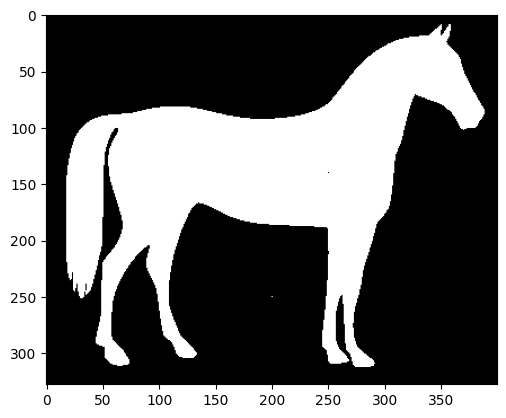

In [102]:
# Image de cheval modifiee : par convention l'objet doit etre blanc sur fond noir,
# et j'ai rajouté un point noir dans la partie blanche, un point blanc dans la partie noire
img = skimage.data.horse()
img_horse = skimage.util.invert(img)
img_horse[250, 200] = 255
img_horse[140, 250] = 0
plt.imshow(img_horse)

Comparez l'erosion et la dilatation pour les 3 éléments structurants pour différentes tailles (par exemple 3, 13, 23). Quelle est l'influence des deux petits points que j'ai rajouté sur l'image ?

In [103]:
tailles = [3, 13, 23, 33]
images_errosion = []
images_dilatation = []
for taille in tailles:
    images_errosion.append(skimage.morphology.erosion(img_horse, skimage.morphology.disk(taille)))
    images_dilatation.append(skimage.morphology.dilation(img_horse, skimage.morphology.disk(taille)))

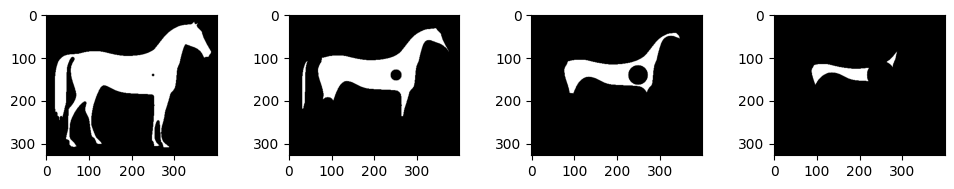

In [104]:
viewlist(images_errosion)


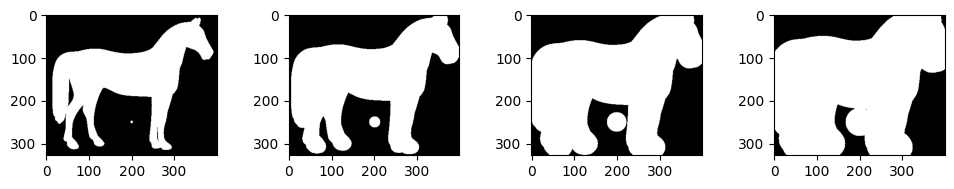

In [105]:
viewlist(images_dilatation)

Maintenant, comparez 3 erosions successives (avec un disque de taille 3) avec une seule erosion de taille 9. Que constatez vous ?

In [106]:
same_image_errosion = []
errosion_image = img_horse
for i in range(3):
    errosion_image = skimage.morphology.erosion(errosion_image, skimage.morphology.disk(3))
    same_image_errosion.append(errosion_image)

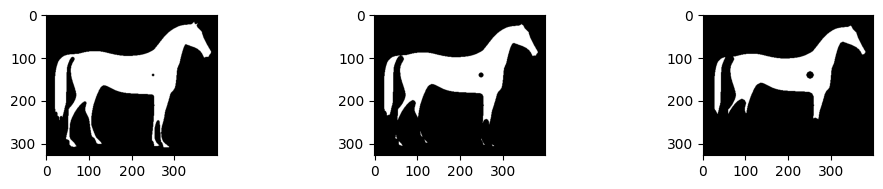

In [107]:
viewlist(same_image_errosion)

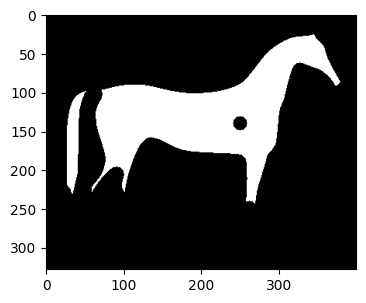

In [108]:
imview(skimage.morphology.erosion(img_horse, skimage.morphology.disk(9)))

### Un peu de bruit maintenant...
Sur notre cher cheval, on va rajouter un petit bruit poivre et sel. En n'utilisant que des érosions et dilatations, restaurez le cheval d'origine. 4 opérations suffisent ! Vérifiez votre résultat en soustrayant votre image débruitée à ```origin_horse```


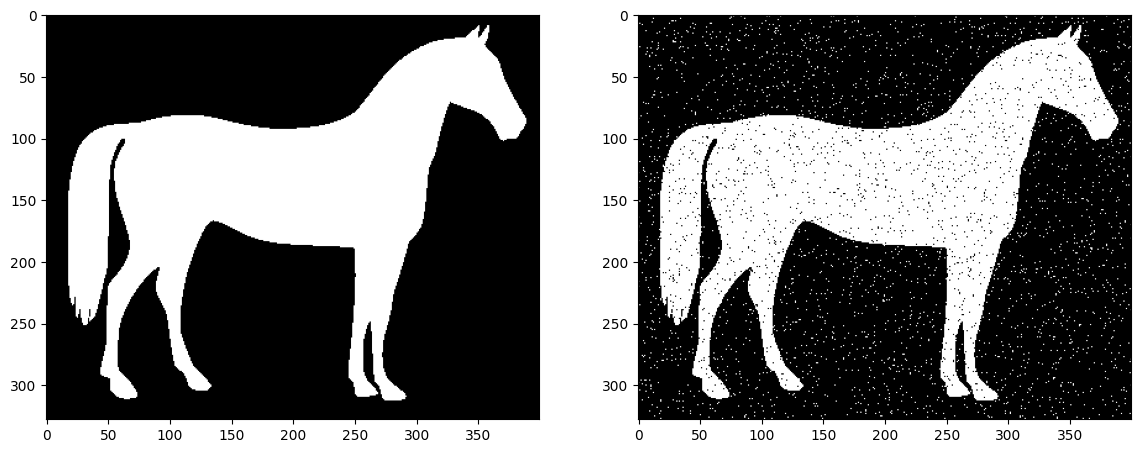

In [109]:
noisy_horse = skimage.util.random_noise(img_horse, mode='s&p')
origin_horse = skimage.util.invert(img)
plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(origin_horse)
plt.subplot(122)
plt.imshow(noisy_horse)

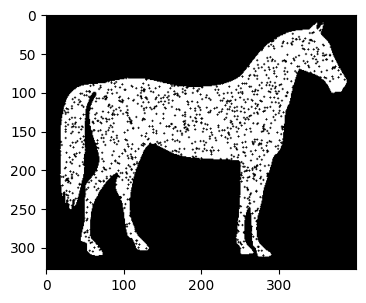

In [110]:
errosion_image = skimage.morphology.erosion(noisy_horse, skimage.morphology.disk(1))
imview(errosion_image)

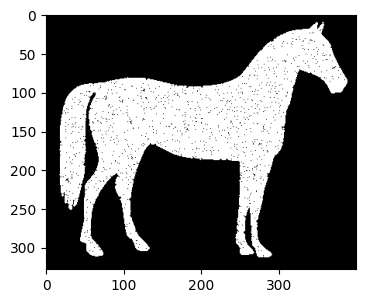

In [111]:
dilatation_image = skimage.morphology.dilation(errosion_image, skimage.morphology.disk(1))
imview(dilatation_image)

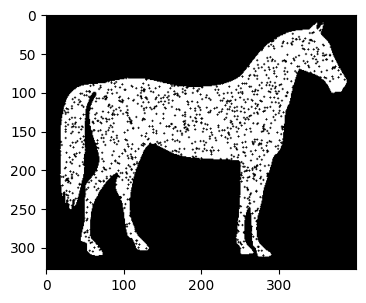

In [112]:
image = skimage.morphology.erosion(dilatation_image, skimage.morphology.disk(1))
imview(image)

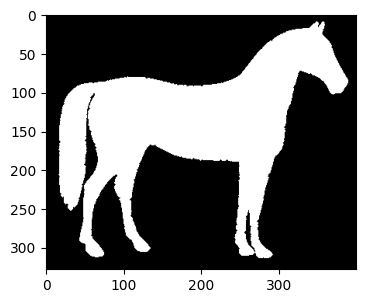

In [113]:
image = skimage.morphology.dilation(dilatation_image, skimage.morphology.disk(1))
imview(image)

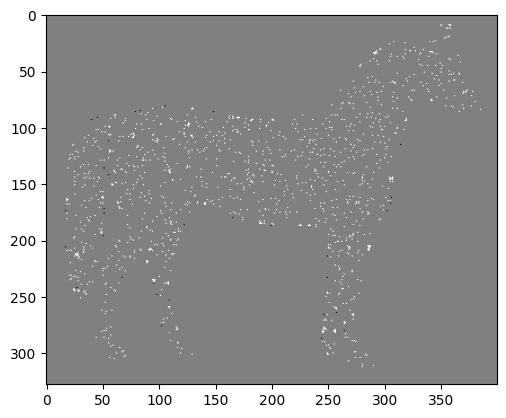

In [114]:
# Pour verifier votre resultat : (pensez à changer le nom de horse_denoised si vous l'avez appelée autrement...)
plt.imshow(origin_horse-dilatation_image)

### Est ce qu'on ne peut pas simplifier ça ? 
Même question mais en seulement 2 opérations. Regardez bien ce que vous avez fait, cet enchaînement d'opérations ne vous rappelle pas quelque chose ?

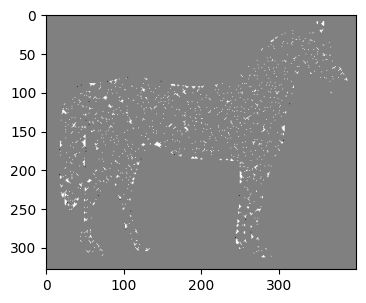

In [115]:
image = skimage.morphology.erosion(noisy_horse, skimage.morphology.disk(2))
image = skimage.morphology.dilation(image, skimage.morphology.disk(2))
imview(origin_horse-image)

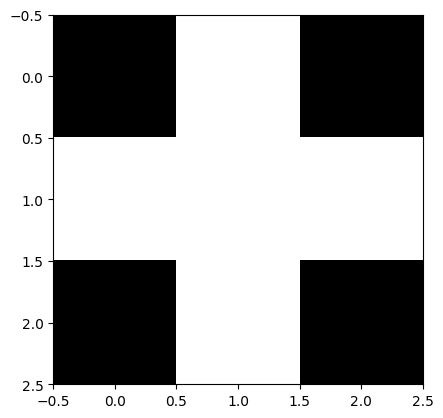

In [116]:
plt.imshow(skimage.morphology.diamond(1))

In [117]:
horse_denoised2 = skimage.morphology.erosion(noisy_horse, skimage.morphology.diamond(2))
horse_denoised2 = skimage.morphology.dilation(horse_denoised2, skimage.morphology.diamond(2))


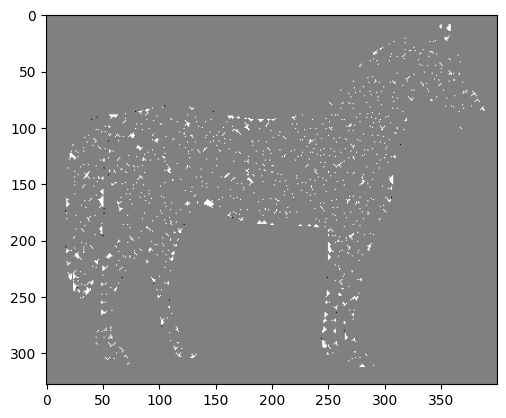

In [118]:
# Pour verifier votre resultat : (pensez à changer le nom de horse_denoised2 si vous l'avez appelée autrement...)
plt.imshow(origin_horse-horse_denoised2)


Faites les opérations dans l'autre sens, que remarquez vous ? 

In [119]:
image = skimage.morphology.dilation(noisy_horse, skimage.morphology.disk(2))
image = skimage.morphology.erosion(image, skimage.morphology.disk(2))


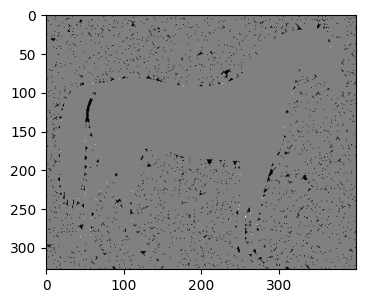

In [120]:
imview(origin_horse-image)

### Filtres alternés séquentiels
On va prendre l'image de notre fidèle dindon

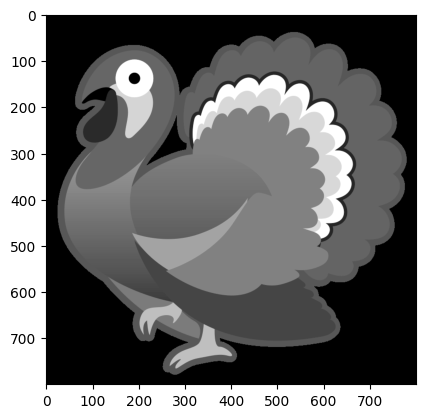

In [121]:
from skimage.color import rgb2gray, rgba2rgb

img_dinde = rgb2gray(rgba2rgb(skimage.io.imread("dinde_grise.png")))
plt.imshow(img_dinde, cmap="gray")

Faites 5 ouvertures successives de taille 3 et comparez à une ouverture de taille 15. Que remarquez vous ? 

In [122]:
nombres_ouv = skimage.morphology.opening(img_dinde, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv15 = skimage.morphology.opening(img_dinde, skimage.morphology.disk(15))

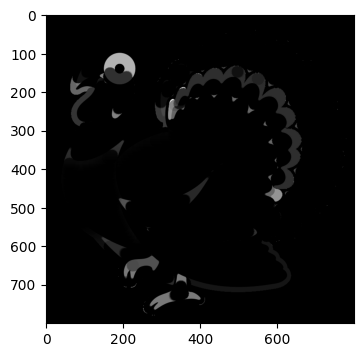

In [123]:
imview(nombres_ouv-nombres_ouv15)

Faites maintenant 5 ouvertures de taille 3 et comparez à une ouverture de taille 3. Que remarquez-vous ?

In [124]:
nombres_ouv = skimage.morphology.opening(img_dinde, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv = skimage.morphology.opening(nombres_ouv, skimage.morphology.disk(3))
nombres_ouv3 = skimage.morphology.opening(img_dinde, skimage.morphology.disk(3))

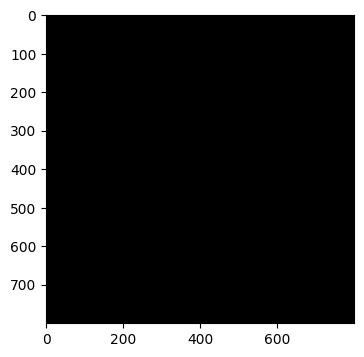

In [125]:
imview(nombres_ouv-nombres_ouv3)

On va maintenant bruiter notre dindon.

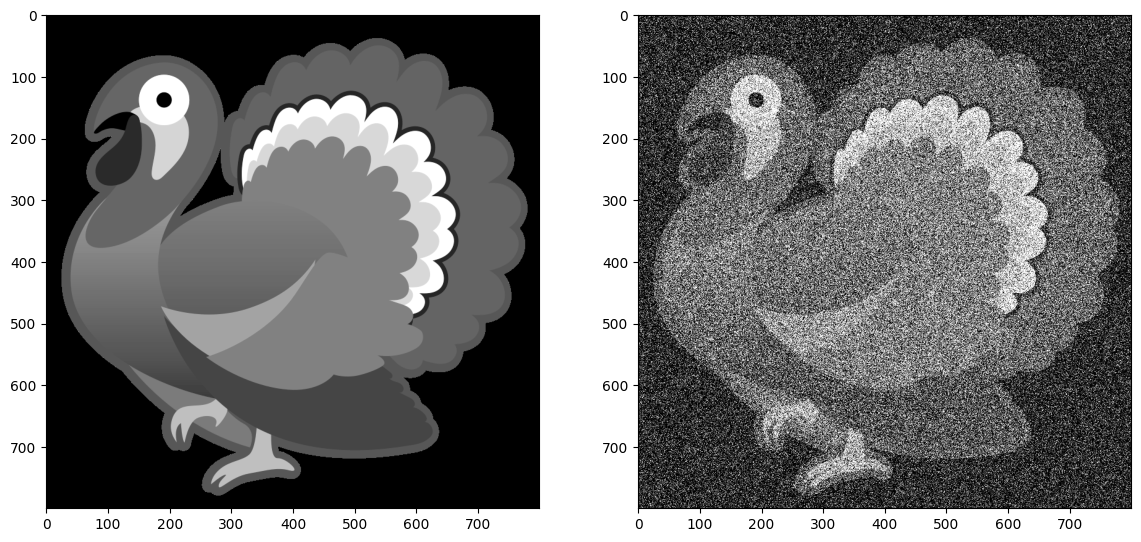

In [126]:
sigma = 0.5
noisy = skimage.util.random_noise(img_dinde, var=sigma**2)
plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(img_dinde, cmap='gray')
plt.subplot(122)
plt.imshow(noisy, cmap='gray')

Effectuez une fermeture puis une ouverture avec un disque de 5. 

In [127]:
dindon_ferme5 = skimage.morphology.closing(noisy, skimage.morphology.disk(5))
dindon_ouv5 = skimage.morphology.opening(dindon_ferme5, skimage.morphology.disk(5))

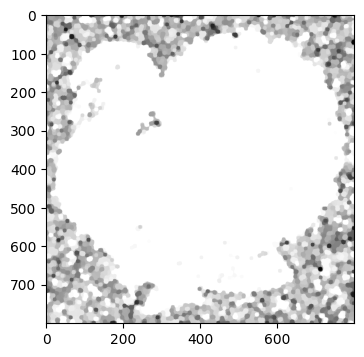

In [128]:
imview(dindon_ouv5)

Effectuez maintenant une fermeture puis une ouverture avec un disque de 1, puis de 2 sur l'image résultante, puis de 3 sur l'image résultante, puis de 4 sur l'image résultante et enfin de 5 sur l'image résultante. Que remarquez-vous ?

In [129]:
im = skimage.morphology.closing(noisy, skimage.morphology.disk(1))
im = skimage.morphology.opening(im, skimage.morphology.disk(1))
im = skimage.morphology.closing(im, skimage.morphology.disk(2))
im = skimage.morphology.opening(im, skimage.morphology.disk(2))
im = skimage.morphology.closing(im, skimage.morphology.disk(3))
im = skimage.morphology.opening(im, skimage.morphology.disk(3))
im = skimage.morphology.closing(im, skimage.morphology.disk(4))
im = skimage.morphology.opening(im, skimage.morphology.disk(4))
im = skimage.morphology.closing(im, skimage.morphology.disk(5))
im = skimage.morphology.opening(im, skimage.morphology.disk(5))

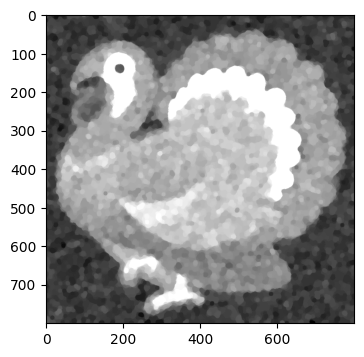

In [130]:
imview(im)

### Retour à l'image du photographe bruitée ! 
Appliquez des opérateurs morpho dessus pour le débruiter...

In [131]:
img_init = skimage.data.camera()
sigma = 0.5
noisy = skimage.util.random_noise(img_init, var=sigma**2)

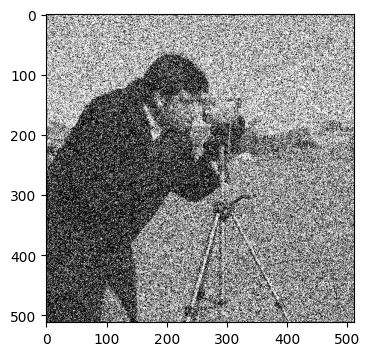

In [132]:
imview(noisy)

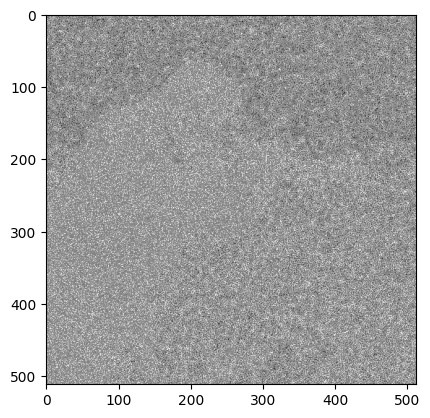

In [133]:
plt.imshow(noisy - skimage.morphology.closing(skimage.morphology.opening(noisy, skimage.morphology.disk(1)), skimage.morphology.disk(1)))

### Passons à des images un peu plus complexes
Le but de cette partie est de voir l'intérêt de la morphologie mathématique, en particulier sa propriété d'invariance au contraste.

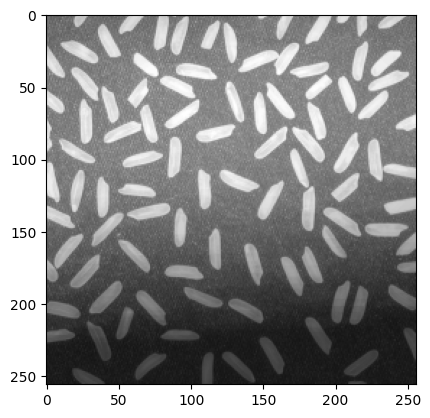

In [134]:
img_riz = skimage.io.imread("riz.png")
plt.imshow(img_riz, vmin=0, vmax=255)

Nous voulons essayer de segmenter les grains de riz, donc binariser l'image de telle manière que les grains de riz soient blancs et que le fond soit noir. Sur ce genre d'images, on a envie de faire un seuil. Seuiller signifie choisir une valeur $ s $ de niveaux de gris pour laquelle tous les pixels de l'image d'origine $I$ ayant un niveau inférieur soient mis à 0 dans l'image seuillée $I_s$ et tous ceux supérieurs à 255 (ou 1, donc blanc).


<center> $ I_s[i,j] = 0 $ si $ I[i,j] < s $ et $ I_s[i,j] = 255 $ si $ I[i,j] \geq s $ </center>

Pouvez-vous modifier la valeur de `mon_seuil` dans la cellule ci-dessous telle qu'on puisse facilement séparer les grains du fond ?

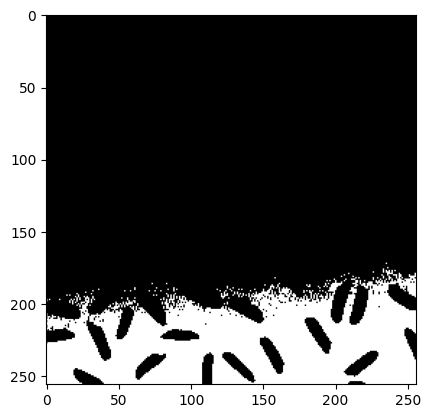

In [200]:
plt.imshow(255 - img_riz > 200, cmap='gray')  

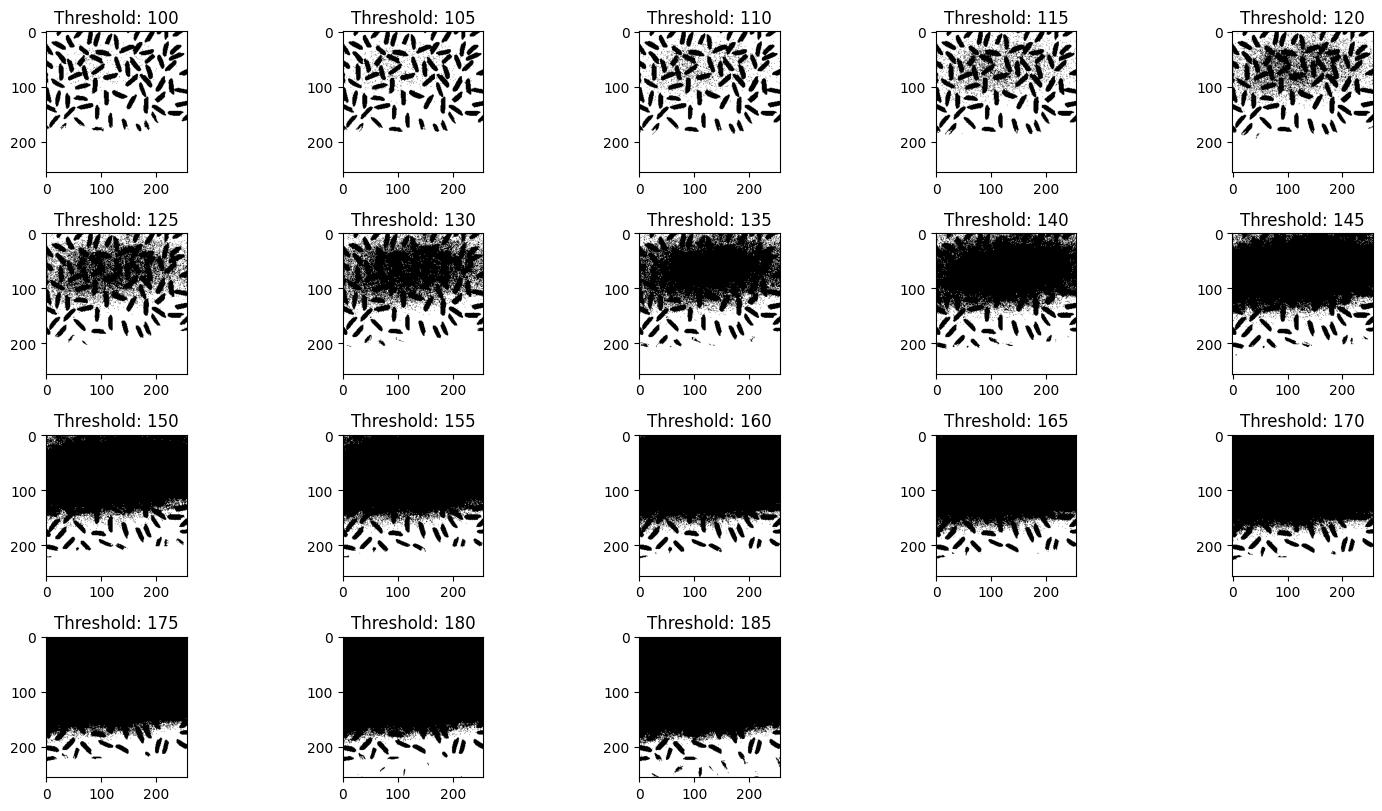

In [229]:
mon_seuil = 50
import matplotlib.pyplot as plt

def show_seuil_sup(img_riz, range_inf, range_sup):
    # Définir la taille de la figure
    plt.figure(figsize=(15, 10))
    
    # Boucle sur différentes valeurs de seuil
    for i, threshold in enumerate(range(range_inf, range_sup, 5), 1):
        plt.subplot(5, 5, i)  
        plt.imshow(img_riz > threshold, cmap='gray')  
        plt.title(f"Threshold: {threshold}")
    
    plt.tight_layout() 
    plt.show() 

def show_seuil_inf(img_riz, range_inf, range_sup):
    # Définir la taille de la figure
    plt.figure(figsize=(15, 10))
    
    # Boucle sur différentes valeurs de seuil
    for i, threshold in enumerate(range(range_inf, range_sup, 5), 1):
        plt.subplot(5, 5, i)  
        plt.imshow(img_riz < threshold, cmap='gray')  
        plt.title(f"Threshold: {threshold}")
    
    plt.tight_layout() 
    plt.show() 

show_seuil_sup(255 - img_riz, 100, 190) 


Le soucis de cette image est le fait que les grains de riz soient sur un fond non homogène. Pour traiter cette image, il faut avant tout corriger le fond avant de seuiller (et éventuellement post-traiter après).
Porposez une solution basée morphologie mathématique pour faire cette correction de fond.

In [222]:
im_fond = skimage.morphology.opening(img_riz, skimage.morphology.disk(10))
#im_fond = skimage.morphology.closing(im_fond, skimage.morphology.disk(2))

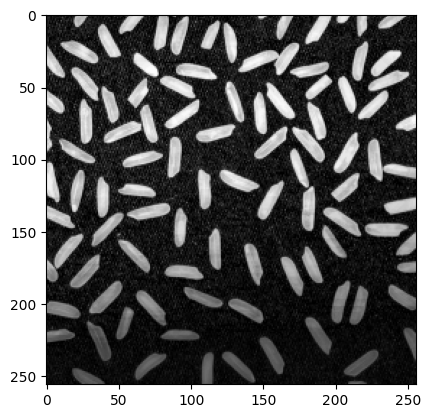

In [223]:
plt.imshow(img_riz - im_fond, cmap="gray")

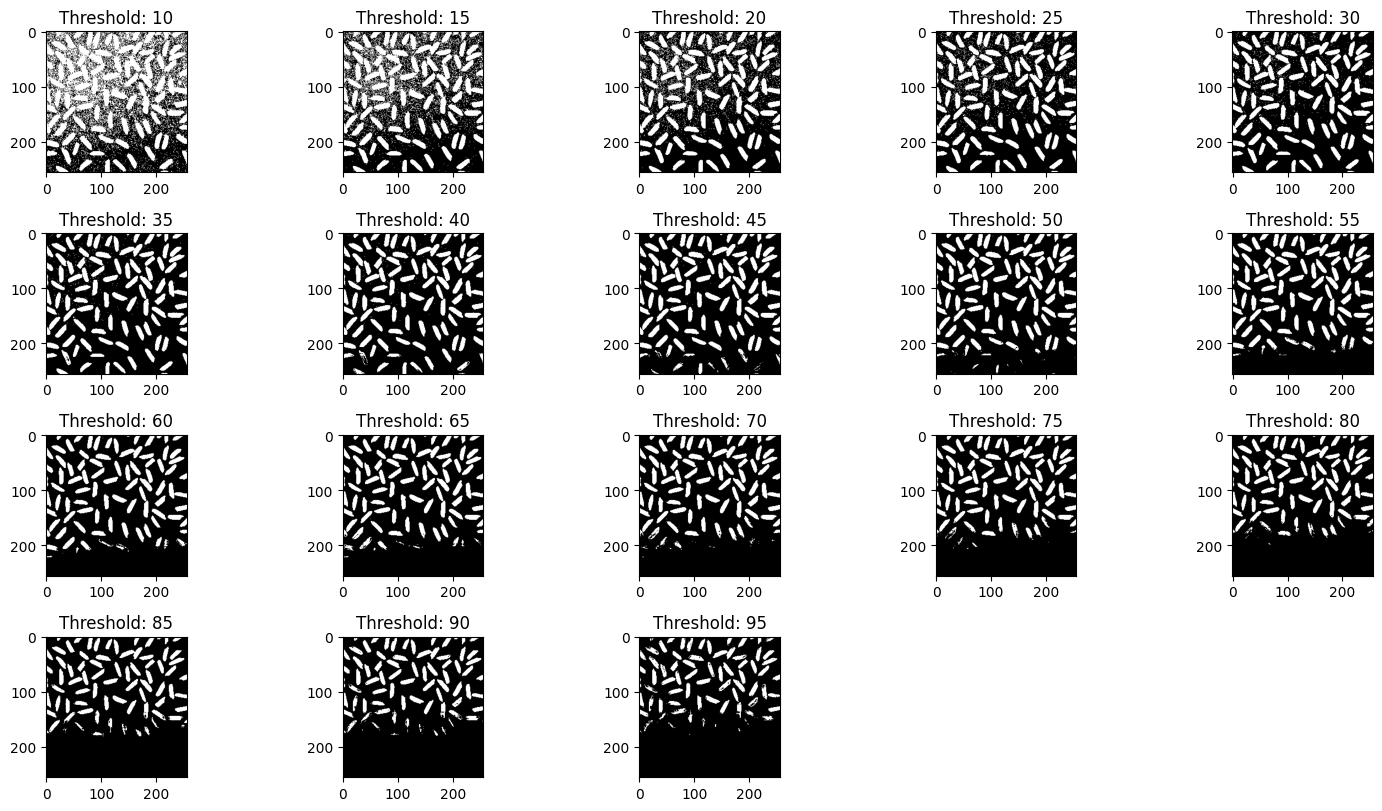

In [230]:
show_seuil_sup(img_riz - im_fond, 10, 100)

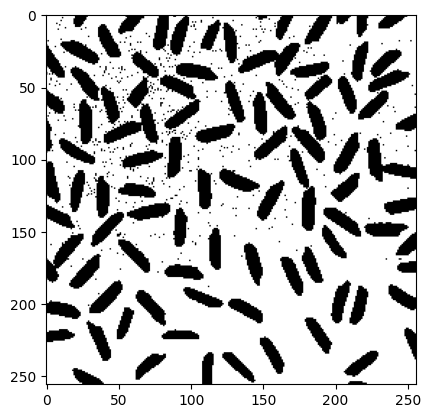

In [261]:
mon_seuil = 37
final_riz = img_riz - skimage.morphology.opening(img_riz, skimage.morphology.disk(10))
plt.imshow(255 - (final_riz > 30))

Même chose avec cette image : ici l'objet à segmenter est le texte. Votre résultat doit donc être des lettres blanches sur fond noir.

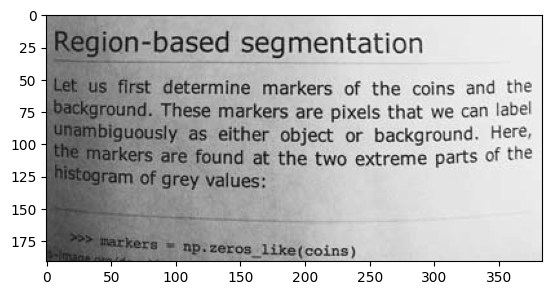

In [262]:
img_page = skimage.data.page()
plt.imshow(img_page, vmin=0, vmax=255)

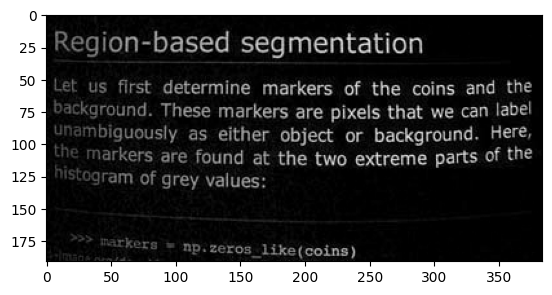

In [263]:
final_seg = skimage.morphology.closing(img_page, skimage.morphology.disk(3)) - img_page
plt.imshow(final_seg)

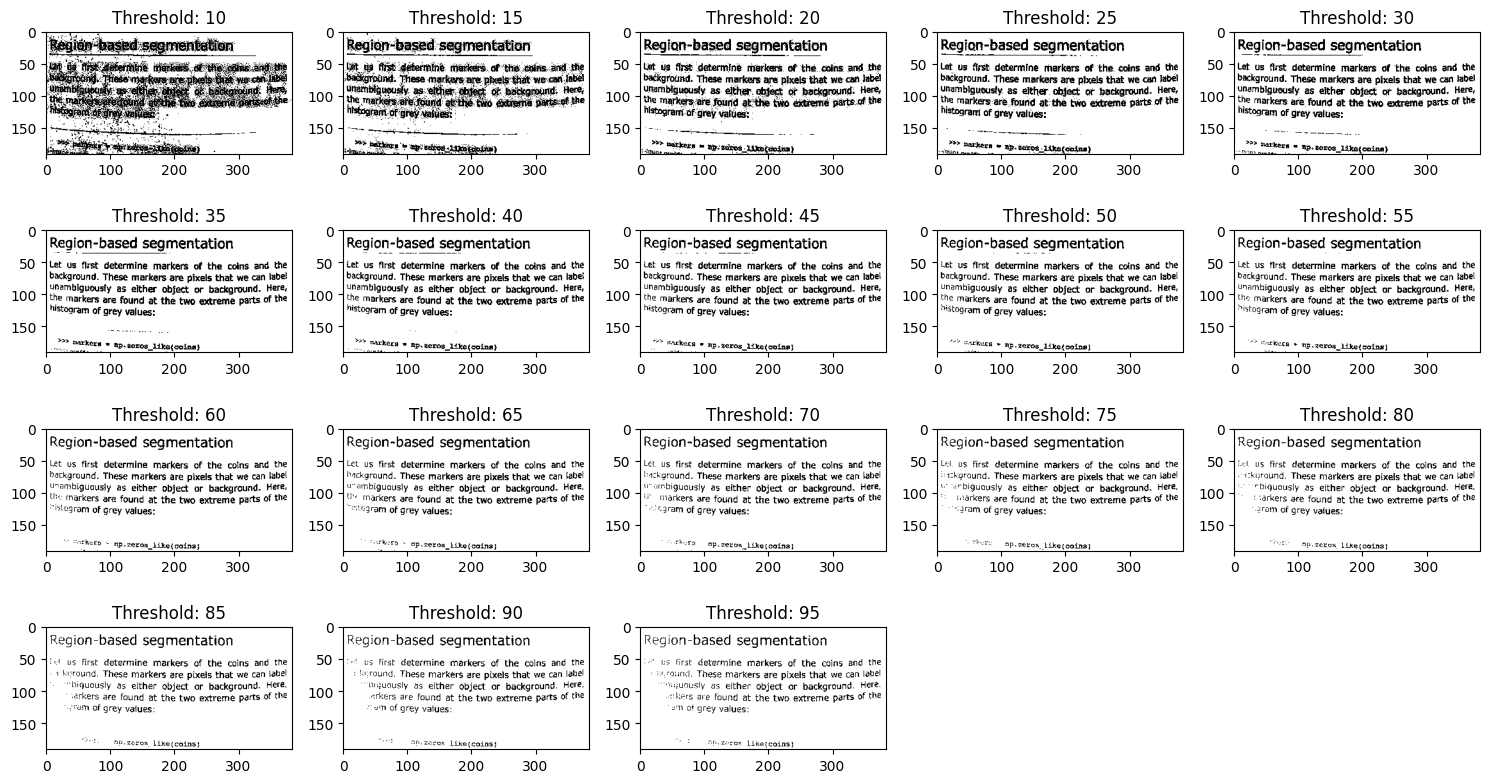

In [264]:
show_seuil_inf(final_seg, 10, 100)

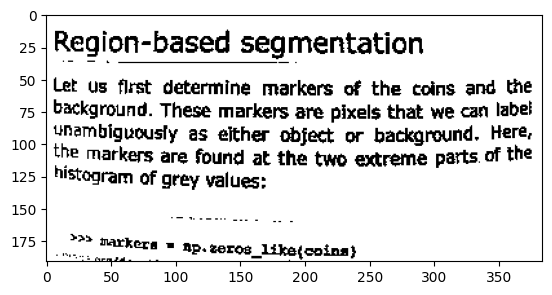

In [265]:

mon_seuil2 = 35
plt.imshow(final_seg<mon_seuil2)

## Bonus
Sur l'image suivante, récupérez les lignes d'une part, les disques de l'autre !

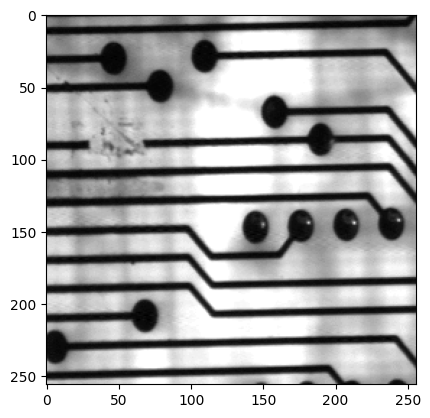

In [266]:
disco = skimage.io.imread("circuit.png")
plt.imshow(disco)

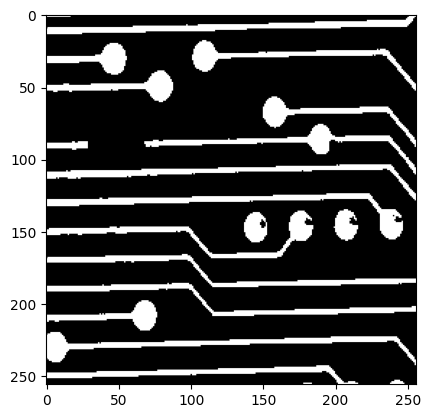

In [292]:
# Elimination du fond
final_disco = skimage.morphology.closing(disco, skimage.morphology.disk(3)) - disco
plt.imshow(disco <50)

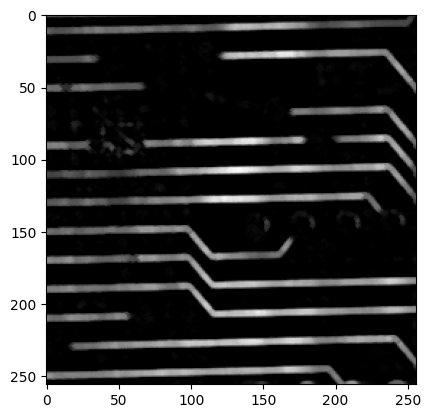

In [330]:
# Extraction des Lignes
im_line = skimage.morphology.opening(final_disco, skimage.morphology.disk(1))
plt.imshow(im_line)

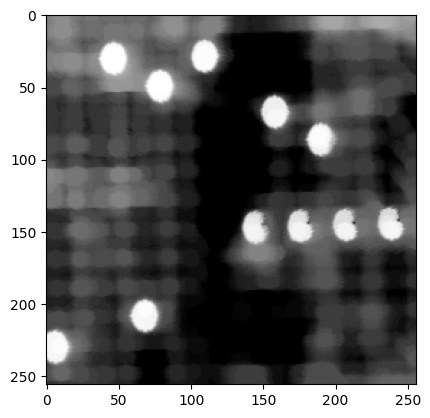

In [332]:
# Exctaction des disk
im_disk = skimage.morphology.closing(disco, skimage.morphology.disk(5))
plt.imshow(255 - im_disk)